In [1]:
from skimage import io, color, filters
import matplotlib.pyplot as plt

from image_processing_tool.single_cv_extraction import x_axil_area, x_axil_OCR, y_axil_area, y_axil_OCR, remove_legend, standarization 

In [3]:
#Load raw image
image_path = './raw_image_example/1.png'
image = io.imread(image_path)

In [5]:
#Set mask according to the color of target individual CV profile
rgb_image = color.rgba2rgb(image)
hsv_image = color.rgb2hsv(rgb_image)
hue_channel = hsv_image[:, :, 0]
sat_channel = hsv_image[:, :, 1]
value_channel = hsv_image[:, :, 2]
mask = (hue_channel > 0.15) & (hue_channel < 0.45)#green is the reaction mixture CV profile in the example raw image
target_curve = image.copy()
target_curve[~mask] = 0

In [7]:
#Detect x and y axils location
gray_image = color.rgb2gray(rgb_image)
thresh = filters.threshold_otsu(gray_image)
binary_image = gray_image > thresh

x_axil_area, max_index_x = x_axil_area(binary_image, gray_image)
x_axil_left_end, x_axil_right_end = x_axil_OCR(x_axil_area)

y_axil_area, max_index_y = y_axil_area(binary_image, gray_image)
y_axil_up_end, y_axil_down_end = y_axil_OCR(y_axil_area)

In [9]:
#Remove legend
cv_area = gray_image[:max_index_x-5,max_index_y+5:]
cv_area_target = target_curve[:max_index_x-5,max_index_y+5:]
cv_area_target = color.rgba2rgb(cv_area_target)
cv_area_target = color.rgb2gray(cv_area_target)

cv_area_target_wo_legend = remove_legend(cv_area, cv_area_target)

Text: ~, Position: (x=271, y=3987, width=620, height=4001)
Text: ~, Position: (x=270, y=3800, width=620, height=3818)
Text: [, Position: (x=667, y=3728, width=693, height=3868)
Text: C, Position: (x=707, y=3755, width=800, height=3869)
Text: o, Position: (x=811, y=3755, width=887, height=3839)
Text: ], Position: (x=897, y=3728, width=923, height=3868)
Text: +, Position: (x=1024, y=3777, width=1054, height=3843)
Text: N, Position: (x=1118, y=3758, width=1203, height=3867)
Text: a, Position: (x=1221, y=3755, width=1291, height=3839)
Text: O, Position: (x=1308, y=3755, width=1411, height=3869)
Text: P, Position: (x=1386, y=3755, width=1464, height=3869)
Text: i, Position: (x=1429, y=3759, width=1511, height=3867)
Text: v, Position: (x=1529, y=3759, width=1622, height=3866)
Text: —, Position: (x=273, y=3617, width=384, height=3628)
Text: —, Position: (x=273, y=3617, width=617, height=3628)
Text: —, Position: (x=498, y=3617, width=588, height=3628)
Text: [, Position: (x=667, y=3536, width=6

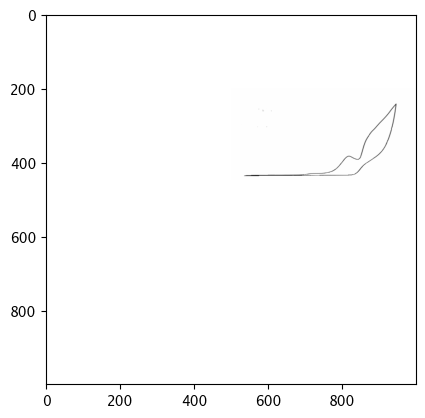

In [11]:
#Standardization
extracted_cv = standarization(cv_area_target_wo_legend, x_axil_right_end, x_axil_left_end, 
                    y_axil_up_end, y_axil_down_end)
plt.imshow(extracted_cv,cmap='gray')
plt.show()